<a href="https://colab.research.google.com/github/nishasrimulyani/pwl_nisha/blob/main/FE_%26_Model_(lama_masih_revisi).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library 

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, date
import matplotlib.pyplot as plt

# Loading Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
transac1  = pd.read_csv('/content/drive/MyDrive/new_dataset/transaction1.csv')
customer = pd.read_csv('/content/drive/MyDrive/new_dataset/customer1.csv')
product = pd.read_csv('/content/drive/MyDrive/new_dataset/product1.csv', on_bad_lines = 'skip')
click_stream = pd.read_csv('/content/drive/MyDrive/new_dataset/click_stream1.csv')

# FEATURE ENGINEERING

In [ ]:
merge1 = pd.merge(transac1, customer, how="left", on=["customer_id"])
merge1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1254585 entries, 0 to 1254584
Data columns (total 39 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Unnamed: 0_x            1254585 non-null  int64  
 1   created_at              1254585 non-null  object 
 2   Month_created           1254585 non-null  int64  
 3   Year_created            1254585 non-null  int64  
 4   customer_id             1254585 non-null  int64  
 5   booking_id              1254585 non-null  object 
 6   session_id              1254585 non-null  object 
 7   product_metadata        1254585 non-null  object 
 8   payment_method          1254585 non-null  object 
 9   payment_status          1254585 non-null  object 
 10  promo_amount            1254585 non-null  int64  
 11  promo_code              1254585 non-null  object 
 12  shipment_fee            1254585 non-null  int64  
 13  shipment_date_limit     1254585 non-null  object 
 14  Mo

In [ ]:
capt1 = transac1[['Year_created','Month_created','customer_id', 'session_id', 'payment_status']]
capt1 = capt1[capt1['payment_status']=='Success']
capt1

,Year_created,Month_created,customer_id,session_id,payment_status
0,2018,7,5868,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Success
1,2018,7,4774,2ee5ead1-f13e-4759-92df-7ff48475e970,Success
2,2018,9,4774,93325fb6-eb00-4268-bb0e-6471795a0ad0,Success
3,2018,11,4774,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Success
4,2018,12,4774,df1042ab-13e6-4072-b9d2-64a81974c51a,Success
...,...,...,...,...,...
1254579,2020,11,25121,33c3bf4f-0f24-4eb8-879d-906bf7e7736a,Success
1254581,2021,12,34829,954e1211-4d45-4d0b-ba84-53e80119592c,Success
1254582,2021,12,99645,e6e6c108-abd0-49a2-b0a5-691117f9cfe1,Success
1254583,2019,12,87319,bb6e5426-a3f3-426a-b99d-79173eaa234b,Success


In [ ]:
icu_tot = capt1.groupby(['Year_created', 'Month_created', 'customer_id', 'payment_status'])['session_id'].nunique().reset_index()
icu_tot

,Year_created,Month_created,customer_id,payment_status,session_id
0,2016,6,74089,Success,1
1,2016,7,221,Success,1
2,2016,7,837,Success,1
3,2016,7,933,Success,1
4,2016,7,1022,Success,1
...,...,...,...,...,...
565536,2022,7,99936,Success,2
565537,2022,7,99976,Success,2
565538,2022,7,99986,Success,1
565539,2022,7,99988,Success,1


In [ ]:
capt1['payment_status'].value_counts()

Success    1201035
Name: payment_status, dtype: int64

In [ ]:
ses1 = capt1.groupby(['Year_created','Month_created','customer_id'])['session_id'].nunique().reset_index()
ses1 = ses1.rename(columns={'session_id': "pembelian"})
ses1

,Year_created,Month_created,customer_id,pembelian
0,2016,6,74089,1
1,2016,7,221,1
2,2016,7,837,1
3,2016,7,933,1
4,2016,7,1022,1
...,...,...,...,...
565536,2022,7,99936,2
565537,2022,7,99976,2
565538,2022,7,99986,1
565539,2022,7,99988,1


In [ ]:
merge2 = pd.merge(merge1, product, how="left", on=["product_id"])
merge2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1254585 entries, 0 to 1254584
Data columns (total 49 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Unnamed: 0_x            1254585 non-null  int64  
 1   created_at              1254585 non-null  object 
 2   Month_created           1254585 non-null  int64  
 3   Year_created            1254585 non-null  int64  
 4   customer_id             1254585 non-null  int64  
 5   booking_id              1254585 non-null  object 
 6   session_id              1254585 non-null  object 
 7   product_metadata        1254585 non-null  object 
 8   payment_method          1254585 non-null  object 
 9   payment_status          1254585 non-null  object 
 10  promo_amount            1254585 non-null  int64  
 11  promo_code              1254585 non-null  object 
 12  shipment_fee            1254585 non-null  int64  
 13  shipment_date_limit     1254585 non-null  object 
 14  Mo

## TAHUN PERTAMA

In [ ]:
#Tahun Pertama
jun2016 = ses1[(ses1.Year_created == 2016) & (ses1.Month_created == 6)]
jul2016 = ses1[(ses1.Year_created == 2016) & (ses1.Month_created == 7)]
aug2016 = ses1[(ses1.Year_created == 2016) & (ses1.Month_created == 8)]
sep2016 = ses1[(ses1.Year_created == 2016) & (ses1.Month_created == 9)]
oct2016 = ses1[(ses1.Year_created == 2016) & (ses1.Month_created == 10)]
nov2016 = ses1[(ses1.Year_created == 2016) & (ses1.Month_created == 11)]
des2016 = ses1[(ses1.Year_created == 2016) & (ses1.Month_created == 12)]
jan2017 = ses1[(ses1.Year_created == 2017) & (ses1.Month_created == 1)]
feb2017 = ses1[(ses1.Year_created == 2017) & (ses1.Month_created == 2)]
mar2017 = ses1[(ses1.Year_created == 2017) & (ses1.Month_created == 3)]
apr2017 = ses1[(ses1.Year_created == 2017) & (ses1.Month_created == 4)]
mei2017 = ses1[(ses1.Year_created == 2017) & (ses1.Month_created == 5)]

In [ ]:
churn1_1 = jun2016.merge(jul2016, on='customer_id', how='outer')
churn1_1.fillna(0, inplace=True)
churn1_1.loc[(churn1_1['Year_created_x'] == 0) | (churn1_1['Year_created_y'] == 0), 'churn'] = 1
churn1_1.loc[(churn1_1['Year_created_x'] != 0) & (churn1_1['Year_created_y'] != 0), 'churn'] = 0
churn1_1.head()

,Year_created_x,Month_created_x,customer_id,pembelian_x,Year_created_y,Month_created_y,pembelian_y,churn
0,2016.0,6.0,74089,1.0,0.0,0.0,0.0,1.0
1,0.0,0.0,221,0.0,2016.0,7.0,1.0,1.0
2,0.0,0.0,837,0.0,2016.0,7.0,1.0,1.0
3,0.0,0.0,933,0.0,2016.0,7.0,1.0,1.0
4,0.0,0.0,1022,0.0,2016.0,7.0,1.0,1.0


In [ ]:
churn1_2 = jul2016.merge(aug2016, on='customer_id', how='outer')
churn1_2.fillna(0, inplace=True)
churn1_2.loc[(churn1_2['Year_created_x'] == 0) | (churn1_2['Year_created_y'] == 0), 'churn'] = 1
churn1_2.loc[(churn1_2['Year_created_x'] != 0) | (churn1_2['Year_created_y'] != 0), 'churn'] =0
churn1_2.head()

,Year_created_x,Month_created_x,customer_id,pembelian_x,Year_created_y,Month_created_y,pembelian_y,churn
0,2016.0,7.0,221,1.0,0.0,0.0,0.0,0.0
1,2016.0,7.0,837,1.0,0.0,0.0,0.0,0.0
2,2016.0,7.0,933,1.0,0.0,0.0,0.0,0.0
3,2016.0,7.0,1022,1.0,0.0,0.0,0.0,0.0
4,2016.0,7.0,1718,1.0,0.0,0.0,0.0,0.0


In [ ]:
churn1_3 = aug2016.merge(sep2016, on= 'customer_id', how='outer')
churn1_3.fillna(0, inplace=True)
churn1_3.loc[(churn1_3['Year_created_x'] == 0) | (churn1_3['Year_created_y'] == 0), 'churn'] = 1
churn1_3.loc[(churn1_3['Year_created_x'] != 0) | (churn1_3['Year_created_y'] != 0), 'churn'] = 0
churn1_3.head()

,Year_created_x,Month_created_x,customer_id,pembelian_x,Year_created_y,Month_created_y,pembelian_y,churn
0,2016.0,8.0,100,1.0,0.0,0.0,0.0,0.0
1,2016.0,8.0,300,1.0,0.0,0.0,0.0,0.0
2,2016.0,8.0,949,1.0,0.0,0.0,0.0,0.0
3,2016.0,8.0,1168,1.0,0.0,0.0,0.0,0.0
4,2016.0,8.0,1308,1.0,0.0,0.0,0.0,0.0


In [ ]:
churn1_4 = sep2016.merge(oct2016, on= 'customer_id', how='outer')
churn1_4.fillna(0, inplace=True)
churn1_4.loc[(churn1_4['Year_created_x'] == 0) |(churn1_4['Year_created_y'] == 0), 'churn'] = 1
churn1_4.loc[(churn1_4['Year_created_x'] != 0) |(churn1_4['Year_created_y'] != 0), 'churn'] = 0
churn1_4.head()

,Year_created_x,Month_created_x,customer_id,pembelian_x,Year_created_y,Month_created_y,pembelian_y,churn
0,2016.0,9.0,215,1.0,0.0,0.0,0.0,0.0
1,2016.0,9.0,665,1.0,0.0,0.0,0.0,0.0
2,2016.0,9.0,786,1.0,0.0,0.0,0.0,0.0
3,2016.0,9.0,990,1.0,0.0,0.0,0.0,0.0
4,2016.0,9.0,1155,1.0,0.0,0.0,0.0,0.0


In [ ]:
churn1_5 = oct2016.merge(nov2016, on= 'customer_id', how='outer')
churn1_5.fillna(0, inplace=True)
churn1_5.loc[(churn1_5['Year_created_x'] == 0) | (churn1_5['Year_created_y'] == 0), 'churn'] = 1
churn1_5.loc[(churn1_5['Year_created_x'] != 0) | (churn1_5['Year_created_y'] != 0), 'churn'] = 0
churn1_5.head()

,Year_created_x,Month_created_x,customer_id,pembelian_x,Year_created_y,Month_created_y,pembelian_y,churn
0,2016.0,10.0,50,1.0,0.0,0.0,0.0,0.0
1,2016.0,10.0,185,1.0,2016.0,11.0,1.0,0.0
2,2016.0,10.0,302,1.0,0.0,0.0,0.0,0.0
3,2016.0,10.0,429,1.0,0.0,0.0,0.0,0.0
4,2016.0,10.0,837,1.0,0.0,0.0,0.0,0.0


In [ ]:
churn1_6 = nov2016.merge(des2016, on= 'customer_id', how='outer')
churn1_6.fillna(0, inplace=True)
churn1_6.loc[(churn1_6['Year_created_x'] == 0) | (churn1_6['Year_created_y'] == 0), 'churn'] = 1
churn1_6.loc[(churn1_6['Year_created_x'] != 0) | (churn1_6['Year_created_y'] == 0), 'churn'] = 0
churn1_6.head()

,Year_created_x,Month_created_x,customer_id,pembelian_x,Year_created_y,Month_created_y,pembelian_y,churn
0,2016.0,11.0,185,1.0,0.0,0.0,0.0,0.0
1,2016.0,11.0,215,1.0,0.0,0.0,0.0,0.0
2,2016.0,11.0,528,1.0,2016.0,12.0,1.0,0.0
3,2016.0,11.0,650,1.0,0.0,0.0,0.0,0.0
4,2016.0,11.0,651,1.0,0.0,0.0,0.0,0.0


In [ ]:
churn1_7 = des2016.merge(jan2017, on= 'customer_id', how='outer')
churn1_7.fillna(0, inplace=True)
churn1_7.loc[(churn1_7['Year_created_x'] == 0) | (churn1_7['Year_created_y'] == 0), 'churn'] = 1
churn1_7.loc[(churn1_7['Year_created_x'] != 0) | (churn1_7['Year_created_y'] != 0), 'churn'] = 0
churn1_7.head()

,Year_created_x,Month_created_x,customer_id,pembelian_x,Year_created_y,Month_created_y,pembelian_y,churn
0,2016.0,12.0,98,2.0,2017.0,1.0,2.0,0.0
1,2016.0,12.0,429,1.0,0.0,0.0,0.0,0.0
2,2016.0,12.0,528,1.0,0.0,0.0,0.0,0.0
3,2016.0,12.0,837,1.0,0.0,0.0,0.0,0.0
4,2016.0,12.0,974,1.0,0.0,0.0,0.0,0.0


In [ ]:
churn1_8 = jan2017.merge(feb2017, on= 'customer_id', how='outer')
churn1_8.fillna(0, inplace=True)
churn1_8.loc[(churn1_8['Year_created_x'] == 0) | (churn1_8['Year_created_y'] == 0), 'churn'] = 1
churn1_8.loc[(churn1_8['Year_created_x'] != 0) | (churn1_8['Year_created_y'] == 0), 'churn'] = 0
churn1_8.head()

,Year_created_x,Month_created_x,customer_id,pembelian_x,Year_created_y,Month_created_y,pembelian_y,churn
0,2017.0,1.0,98,2.0,2017.0,2.0,3.0,0.0
1,2017.0,1.0,215,1.0,0.0,0.0,0.0,0.0
2,2017.0,1.0,221,1.0,0.0,0.0,0.0,0.0
3,2017.0,1.0,305,1.0,0.0,0.0,0.0,0.0
4,2017.0,1.0,535,1.0,0.0,0.0,0.0,0.0


In [ ]:
churn1_9 = feb2017.merge(mar2017, on= 'customer_id', how='outer')
churn1_9.fillna(0, inplace=True)
churn1_9.loc[(churn1_9['Year_created_x'] == 0) | (churn1_9['Year_created_y'] == 0), 'churn'] = 1
churn1_9.loc[(churn1_9['Year_created_x'] != 0) | (churn1_9['Year_created_y'] == 0), 'churn'] = 0
churn1_9.head()

,Year_created_x,Month_created_x,customer_id,pembelian_x,Year_created_y,Month_created_y,pembelian_y,churn
0,2017.0,2.0,98,3.0,2017.0,3.0,2.0,0.0
1,2017.0,2.0,210,1.0,0.0,0.0,0.0,0.0
2,2017.0,2.0,302,1.0,0.0,0.0,0.0,0.0
3,2017.0,2.0,429,1.0,0.0,0.0,0.0,0.0
4,2017.0,2.0,494,1.0,2017.0,3.0,2.0,0.0


In [ ]:
churn1_10 = mar2017.merge(apr2017, on= 'customer_id', how='outer')
churn1_10.fillna(0, inplace=True)
churn1_10.loc[(churn1_10['Year_created_x'] == 0) | (churn1_10['Year_created_y'] == 0), 'churn'] = 1
churn1_10.loc[(churn1_10['Year_created_x'] != 0) | (churn1_10['Year_created_y'] == 0), 'churn'] = 0
churn1_10.head()

,Year_created_x,Month_created_x,customer_id,pembelian_x,Year_created_y,Month_created_y,pembelian_y,churn
0,2017.0,3.0,90,1.0,0.0,0.0,0.0,0.0
1,2017.0,3.0,98,2.0,2017.0,4.0,3.0,0.0
2,2017.0,3.0,155,1.0,2017.0,4.0,1.0,0.0
3,2017.0,3.0,185,1.0,0.0,0.0,0.0,0.0
4,2017.0,3.0,199,2.0,2017.0,4.0,2.0,0.0


In [ ]:
churn1_11 = apr2017.merge(mei2017, on= 'customer_id', how='outer')
churn1_11.fillna(0, inplace=True)
churn1_11.loc[(churn1_11['Year_created_x'] == 0) | (churn1_11['Year_created_y'] == 0), 'churn'] = 1
churn1_11.loc[(churn1_11['Year_created_x'] != 0) | (churn1_11['Year_created_y'] == 0), 'churn'] = 0
churn1_11.head()

,Year_created_x,Month_created_x,customer_id,pembelian_x,Year_created_y,Month_created_y,pembelian_y,churn
0,2017.0,4.0,98,3.0,2017.0,5.0,3.0,0.0
1,2017.0,4.0,155,1.0,2017.0,5.0,1.0,0.0
2,2017.0,4.0,179,1.0,2017.0,5.0,1.0,0.0
3,2017.0,4.0,182,1.0,0.0,0.0,0.0,0.0
4,2017.0,4.0,199,2.0,2017.0,5.0,2.0,0.0


In [ ]:
year1 = pd.concat([churn1_1, churn1_2, churn1_3, churn1_4, churn1_5,
                   churn1_6, churn1_7, churn1_8, churn1_9, churn1_10,
                   churn1_11 ])
year1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16030 entries, 0 to 2456
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year_created_x   16030 non-null  float64
 1   Month_created_x  16030 non-null  float64
 2   customer_id      16030 non-null  int64  
 3   pembelian_x      16030 non-null  float64
 4   Year_created_y   16030 non-null  float64
 5   Month_created_y  16030 non-null  float64
 6   pembelian_y      16030 non-null  float64
 7   churn            16030 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 1.1 MB


## TAHUN KEDUA

In [ ]:
#Tahun Kedua
jun2017 = ses1[(ses1.Year_created == 2017) & (ses1.Month_created == 6)]
jul2017 = ses1[(ses1.Year_created == 2017) & (ses1.Month_created == 7)]
aug2017 = ses1[(ses1.Year_created == 2017) & (ses1.Month_created == 8)]
sep2017 = ses1[(ses1.Year_created == 2017) & (ses1.Month_created == 9)]
oct2017 = ses1[(ses1.Year_created == 2017) & (ses1.Month_created == 10)]
nov2017 = ses1[(ses1.Year_created == 2017) & (ses1.Month_created == 11)]
des2017 = ses1[(ses1.Year_created == 2017) & (ses1.Month_created == 12)]
jan2018 = ses1[(ses1.Year_created == 2018) & (ses1.Month_created == 1)]
feb2018 = ses1[(ses1.Year_created == 2018) & (ses1.Month_created == 2)]
mar2018 = ses1[(ses1.Year_created == 2018) & (ses1.Month_created == 3)]
apr2018 = ses1[(ses1.Year_created == 2018) & (ses1.Month_created == 4)]
mei2018 = ses1[(ses1.Year_created == 2018) & (ses1.Month_created == 5)]

In [ ]:
churn2_1 = mei2017.merge(jun2017, on= 'customer_id', how='outer')
churn2_1.fillna(0, inplace=True)
churn2_1.loc[(churn2_1['Year_created_x'] == 0) | (churn2_1['Year_created_y'] == 0), 'churn'] = 1
churn2_1.loc[(churn2_1['Year_created_x'] != 0) | (churn2_1['Year_created_y'] == 0), 'churn'] = 0
churn2_1.head()

,Year_created_x,Month_created_x,customer_id,pembelian_x,Year_created_y,Month_created_y,pembelian_y,churn
0,2017.0,5.0,98,3.0,2017.0,6.0,3.0,0.0
1,2017.0,5.0,155,1.0,2017.0,6.0,1.0,0.0
2,2017.0,5.0,179,1.0,0.0,0.0,0.0,0.0
3,2017.0,5.0,185,1.0,0.0,0.0,0.0,0.0
4,2017.0,5.0,199,2.0,2017.0,6.0,2.0,0.0


In [ ]:
churn2_2 = jun2017.merge(jul2017, on= 'customer_id', how='outer')
churn2_2.fillna(0, inplace=True)
churn2_2.loc[(churn2_2['Year_created_x'] == 0) | (churn2_2['Year_created_y'] == 0), 'churn'] = 1
churn2_2.loc[(churn2_2['Year_created_x'] != 0) | (churn2_2['Year_created_y'] == 0), 'churn'] = 0
churn2_2.head()

,Year_created_x,Month_created_x,customer_id,pembelian_x,Year_created_y,Month_created_y,pembelian_y,churn
0,2017.0,6.0,98,3.0,2017.0,7.0,3.0,0.0
1,2017.0,6.0,155,1.0,0.0,0.0,0.0,0.0
2,2017.0,6.0,182,1.0,0.0,0.0,0.0,0.0
3,2017.0,6.0,199,2.0,2017.0,7.0,2.0,0.0
4,2017.0,6.0,215,1.0,0.0,0.0,0.0,0.0


In [ ]:
churn2_3 = jul2017.merge(aug2017, on= 'customer_id', how='outer')
churn2_3.fillna(0, inplace=True)
churn2_3.loc[(churn2_3['Year_created_x'] == 0) | (churn2_3['Year_created_y'] == 0), 'churn'] = 1
churn2_3.loc[(churn2_3['Year_created_x'] != 0) | (churn2_3['Year_created_y'] == 0), 'churn'] = 0
churn2_3.head()

,Year_created_x,Month_created_x,customer_id,pembelian_x,Year_created_y,Month_created_y,pembelian_y,churn
0,2017.0,7.0,36,1.0,0.0,0.0,0.0,0.0
1,2017.0,7.0,46,1.0,0.0,0.0,0.0,0.0
2,2017.0,7.0,98,3.0,2017.0,8.0,1.0,0.0
3,2017.0,7.0,108,1.0,0.0,0.0,0.0,0.0
4,2017.0,7.0,179,1.0,0.0,0.0,0.0,0.0


In [ ]:
churn2_4 = aug2017.merge(sep2017, on= 'customer_id', how='outer')
churn2_4.fillna(0, inplace=True)
churn2_4.loc[(churn2_4['Year_created_x'] == 0) | (churn2_4['Year_created_y'] == 0), 'churn'] = 1
churn2_4.loc[(churn2_4['Year_created_x'] != 0) | (churn2_4['Year_created_y'] == 0), 'churn'] = 0
churn2_4.head()

,Year_created_x,Month_created_x,customer_id,pembelian_x,Year_created_y,Month_created_y,pembelian_y,churn
0,2017.0,8.0,57,1.0,2017.0,9.0,1.0,0.0
1,2017.0,8.0,98,1.0,2017.0,9.0,3.0,0.0
2,2017.0,8.0,110,1.0,0.0,0.0,0.0,0.0
3,2017.0,8.0,141,1.0,0.0,0.0,0.0,0.0
4,2017.0,8.0,155,1.0,2017.0,9.0,1.0,0.0


In [ ]:
churn2_5 = sep2017.merge(oct2017, on= 'customer_id', how='outer')
churn2_5.fillna(0, inplace=True)
churn2_5.loc[(churn2_5['Year_created_x'] == 0) | (churn2_5['Year_created_y'] == 0), 'churn'] = 1
churn2_5.loc[(churn2_5['Year_created_x'] != 0) | (churn2_5['Year_created_y'] == 0), 'churn'] = 0
churn2_5.head()

,Year_created_x,Month_created_x,customer_id,pembelian_x,Year_created_y,Month_created_y,pembelian_y,churn
0,2017.0,9.0,57,1.0,0.0,0.0,0.0,0.0
1,2017.0,9.0,98,3.0,2017.0,10.0,3.0,0.0
2,2017.0,9.0,109,1.0,0.0,0.0,0.0,0.0
3,2017.0,9.0,123,1.0,0.0,0.0,0.0,0.0
4,2017.0,9.0,155,1.0,2017.0,10.0,1.0,0.0


In [ ]:
churn2_6 = oct2017.merge(nov2017, on= 'customer_id', how='outer')
churn2_6.fillna(0, inplace=True)
churn2_6.loc[(churn2_6['Year_created_x'] == 0) | (churn2_6['Year_created_y'] == 0), 'churn'] = 1
churn2_6.loc[(churn2_6['Year_created_x'] != 0) | (churn2_6['Year_created_y'] == 0), 'churn'] = 0
churn2_6.head()

,Year_created_x,Month_created_x,customer_id,pembelian_x,Year_created_y,Month_created_y,pembelian_y,churn
0,2017.0,10.0,98,3.0,2017.0,11.0,2.0,0.0
1,2017.0,10.0,155,1.0,2017.0,11.0,1.0,0.0
2,2017.0,10.0,199,2.0,2017.0,11.0,2.0,0.0
3,2017.0,10.0,302,1.0,0.0,0.0,0.0,0.0
4,2017.0,10.0,424,1.0,2017.0,11.0,1.0,0.0


In [ ]:
churn2_7 = nov2017.merge(des2017, on= 'customer_id', how='outer')
churn2_7.fillna(0, inplace=True)
churn2_7.loc[(churn2_7['Year_created_x'] == 0) | (churn2_7['Year_created_y'] == 0), 'churn'] = 1
churn2_7.loc[(churn2_7['Year_created_x'] != 0) | (churn2_7['Year_created_y'] == 0), 'churn'] = 0
churn2_7.head()

,Year_created_x,Month_created_x,customer_id,pembelian_x,Year_created_y,Month_created_y,pembelian_y,churn
0,2017.0,11.0,57,1.0,0.0,0.0,0.0,0.0
1,2017.0,11.0,67,1.0,0.0,0.0,0.0,0.0
2,2017.0,11.0,98,2.0,2017.0,12.0,1.0,0.0
3,2017.0,11.0,109,1.0,0.0,0.0,0.0,0.0
4,2017.0,11.0,126,1.0,2017.0,12.0,1.0,0.0


In [ ]:
churn2_8 = des2017.merge(jan2018, on= 'customer_id', how='outer')
churn2_8.fillna(0, inplace=True)
churn2_8.loc[(churn2_8['Year_created_x'] == 0) | (churn2_8['Year_created_y'] == 0), 'churn'] = 1
churn2_8.loc[(churn2_8['Year_created_x'] != 0) | (churn2_8['Year_created_y'] == 0), 'churn'] = 0
churn2_8.head()

,Year_created_x,Month_created_x,customer_id,pembelian_x,Year_created_y,Month_created_y,pembelian_y,churn
0,2017.0,12.0,90,1.0,0.0,0.0,0.0,0.0
1,2017.0,12.0,98,1.0,2018.0,1.0,3.0,0.0
2,2017.0,12.0,126,1.0,2018.0,1.0,1.0,0.0
3,2017.0,12.0,155,1.0,2018.0,1.0,1.0,0.0
4,2017.0,12.0,179,1.0,0.0,0.0,0.0,0.0


In [ ]:
churn2_9 = jan2018.merge(feb2018, on= 'customer_id', how='outer')
churn2_9.fillna(0, inplace=True)
churn2_9.loc[(churn2_9['Year_created_x'] == 0) | (churn2_9['Year_created_y'] == 0), 'churn'] = 1
churn2_9.loc[(churn2_9['Year_created_x'] != 0) | (churn2_9['Year_created_y'] == 0), 'churn'] = 0
churn2_9.head()

,Year_created_x,Month_created_x,customer_id,pembelian_x,Year_created_y,Month_created_y,pembelian_y,churn
0,2018.0,1.0,46,1.0,0.0,0.0,0.0,0.0
1,2018.0,1.0,57,1.0,2018.0,2.0,1.0,0.0
2,2018.0,1.0,89,1.0,0.0,0.0,0.0,0.0
3,2018.0,1.0,98,3.0,2018.0,2.0,3.0,0.0
4,2018.0,1.0,109,1.0,0.0,0.0,0.0,0.0


In [ ]:
churn2_10 = feb2018.merge(mar2018, on= 'customer_id', how='outer')
churn2_10.fillna(0, inplace=True)
churn2_10.loc[(churn2_10['Year_created_x'] == 0) | (churn2_10['Year_created_y'] == 0), 'churn'] = 1
churn2_10.loc[(churn2_10['Year_created_x'] != 0) | (churn2_10['Year_created_y'] == 0), 'churn'] = 0
churn2_10.head()

,Year_created_x,Month_created_x,customer_id,pembelian_x,Year_created_y,Month_created_y,pembelian_y,churn
0,2018.0,2.0,57,1.0,0.0,0.0,0.0,0.0
1,2018.0,2.0,91,1.0,0.0,0.0,0.0,0.0
2,2018.0,2.0,98,3.0,0.0,0.0,0.0,0.0
3,2018.0,2.0,126,1.0,2018.0,3.0,1.0,0.0
4,2018.0,2.0,155,1.0,2018.0,3.0,1.0,0.0


In [ ]:
churn2_11 = mar2018.merge(apr2018, on= 'customer_id', how='outer')
churn2_11.fillna(0, inplace=True)
churn2_11.loc[(churn2_11['Year_created_x'] == 0) | (churn2_11['Year_created_y'] == 0), 'churn'] = 1
churn2_11.loc[(churn2_11['Year_created_x'] != 0) | (churn2_11['Year_created_y'] == 0), 'churn'] = 0
churn2_11.head()

,Year_created_x,Month_created_x,customer_id,pembelian_x,Year_created_y,Month_created_y,pembelian_y,churn
0,2018.0,3.0,109,1.0,0.0,0.0,0.0,0.0
1,2018.0,3.0,126,1.0,2018.0,4.0,2.0,0.0
2,2018.0,3.0,155,1.0,2018.0,4.0,1.0,0.0
3,2018.0,3.0,199,2.0,2018.0,4.0,2.0,0.0
4,2018.0,3.0,218,1.0,2018.0,4.0,1.0,0.0


In [ ]:
churn2_12 = apr2018.merge(mei2018, on= 'customer_id', how='outer')
churn2_12.fillna(0, inplace=True)
churn2_12.loc[(churn2_12['Year_created_x'] == 0) | (churn2_12['Year_created_y'] == 0), 'churn'] = 1
churn2_12.loc[(churn2_12['Year_created_x'] != 0) | (churn2_12['Year_created_y'] == 0), 'churn'] = 0
churn2_12.head()

,Year_created_x,Month_created_x,customer_id,pembelian_x,Year_created_y,Month_created_y,pembelian_y,churn
0,2018.0,4.0,57,1.0,0.0,0.0,0.0,0.0
1,2018.0,4.0,89,1.0,0.0,0.0,0.0,0.0
2,2018.0,4.0,98,2.0,2018.0,5.0,3.0,0.0
3,2018.0,4.0,108,1.0,0.0,0.0,0.0,0.0
4,2018.0,4.0,110,1.0,0.0,0.0,0.0,0.0


In [ ]:
year2 = pd.concat([churn2_1, churn2_2, churn2_3, churn2_4, churn2_5,
                   churn2_6, churn2_7, churn2_8, churn2_9, churn2_10,
                   churn2_11, churn2_12 ])
year2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51131 entries, 0 to 5686
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year_created_x   51131 non-null  float64
 1   Month_created_x  51131 non-null  float64
 2   customer_id      51131 non-null  int64  
 3   pembelian_x      51131 non-null  float64
 4   Year_created_y   51131 non-null  float64
 5   Month_created_y  51131 non-null  float64
 6   pembelian_y      51131 non-null  float64
 7   churn            51131 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 3.5 MB


## TAHUN KETIGA

In [ ]:
#Tahun ketiga
jun2018 = ses1[(ses1.Year_created == 2018) & (ses1.Month_created == 6)]
jul2018 = ses1[(ses1.Year_created == 2018) & (ses1.Month_created == 7)]
aug2018 = ses1[(ses1.Year_created == 2018) & (ses1.Month_created == 8)]
sep2018 = ses1[(ses1.Year_created == 2018) & (ses1.Month_created == 9)]
oct2018 = ses1[(ses1.Year_created == 2018) & (ses1.Month_created == 10)]
nov2018 = ses1[(ses1.Year_created == 2018) & (ses1.Month_created == 11)]
des2018 = ses1[(ses1.Year_created == 2018) & (ses1.Month_created == 12)]
jan2019 = ses1[(ses1.Year_created == 2019) & (ses1.Month_created == 1)]
feb2019 = ses1[(ses1.Year_created == 2019) & (ses1.Month_created == 2)]
mar2019 = ses1[(ses1.Year_created == 2019) & (ses1.Month_created == 3)]
apr2019 = ses1[(ses1.Year_created == 2019) & (ses1.Month_created == 4)]
mei2019 = ses1[(ses1.Year_created == 2019) & (ses1.Month_created == 5)]

In [ ]:
churn3_1 = mei2018.merge(jun2018, on= 'customer_id', how='outer')
churn3_1.fillna(0, inplace=True)
churn3_1.loc[(churn3_1['Year_created_x'] == 0) | (churn3_1['Year_created_y'] == 0), 'churn'] = 1
churn3_1.loc[(churn3_1['Year_created_x'] != 0) | (churn3_1['Year_created_y'] == 0), 'churn'] = 0
churn3_1.head()

,Year_created_x,Month_created_x,customer_id,pembelian_x,Year_created_y,Month_created_y,pembelian_y,churn
0,2018.0,5.0,32,1.0,0.0,0.0,0.0,0.0
1,2018.0,5.0,98,3.0,2018.0,6.0,1.0,0.0
2,2018.0,5.0,109,1.0,0.0,0.0,0.0,0.0
3,2018.0,5.0,126,1.0,2018.0,6.0,1.0,0.0
4,2018.0,5.0,155,1.0,2018.0,6.0,1.0,0.0


In [ ]:
churn3_2 = jun2018.merge(jul2018, on= 'customer_id', how='outer')
churn3_2.fillna(0, inplace=True)
churn3_2.loc[(churn3_2['Year_created_x'] == 0) | (churn3_2['Year_created_y'] == 0), 'churn'] = 1
churn3_2.loc[(churn3_2['Year_created_x'] != 0) | (churn3_2['Year_created_y'] == 0), 'churn'] = 0
churn3_2.head()

,Year_created_x,Month_created_x,customer_id,pembelian_x,Year_created_y,Month_created_y,pembelian_y,churn
0,2018.0,6.0,57,1.0,2018.0,7.0,1.0,0.0
1,2018.0,6.0,89,1.0,0.0,0.0,0.0,0.0
2,2018.0,6.0,98,1.0,2018.0,7.0,2.0,0.0
3,2018.0,6.0,123,1.0,0.0,0.0,0.0,0.0
4,2018.0,6.0,126,1.0,2018.0,7.0,1.0,0.0


In [ ]:
churn3_3 = jul2018.merge(aug2018, on= 'customer_id', how='outer')
churn3_3.fillna(0, inplace=True)
churn3_3.loc[(churn3_3['Year_created_x'] == 0) | (churn3_3['Year_created_y'] == 0), 'churn'] = 1
churn3_3.loc[(churn3_3['Year_created_x'] != 0) | (churn3_3['Year_created_y'] == 0), 'churn'] = 0
churn3_3.head()

,Year_created_x,Month_created_x,customer_id,pembelian_x,Year_created_y,Month_created_y,pembelian_y,churn
0,2018.0,7.0,46,1.0,0.0,0.0,0.0,0.0
1,2018.0,7.0,57,1.0,0.0,0.0,0.0,0.0
2,2018.0,7.0,67,1.0,0.0,0.0,0.0,0.0
3,2018.0,7.0,98,2.0,2018.0,8.0,3.0,0.0
4,2018.0,7.0,109,1.0,0.0,0.0,0.0,0.0


In [ ]:
churn3_4 = aug2018.merge(sep2018, on= 'customer_id', how='outer')
churn3_4.fillna(0, inplace=True)
churn3_4.loc[(churn3_4['Year_created_x'] == 0) | (churn3_4['Year_created_y'] == 0), 'churn'] = 1
churn3_4.loc[(churn3_4['Year_created_x'] != 0) | (churn3_4['Year_created_y'] == 0), 'churn'] = 0
churn3_4.head()

,Year_created_x,Month_created_x,customer_id,pembelian_x,Year_created_y,Month_created_y,pembelian_y,churn
0,2018.0,8.0,3,1.0,2018.0,9.0,1.0,0.0
1,2018.0,8.0,32,1.0,0.0,0.0,0.0,0.0
2,2018.0,8.0,98,3.0,2018.0,9.0,2.0,0.0
3,2018.0,8.0,126,1.0,2018.0,9.0,1.0,0.0
4,2018.0,8.0,155,2.0,2018.0,9.0,1.0,0.0


In [ ]:
churn3_5 = sep2018.merge(oct2018, on= 'customer_id', how='outer')
churn3_5.fillna(0, inplace=True)
churn3_5.loc[(churn3_5['Year_created_x'] == 0) | (churn3_5['Year_created_y'] == 0), 'churn'] = 1
churn3_5.loc[(churn3_5['Year_created_x'] != 0) | (churn3_5['Year_created_y'] == 0), 'churn'] = 0
churn3_5.head()

,Year_created_x,Month_created_x,customer_id,pembelian_x,Year_created_y,Month_created_y,pembelian_y,churn
0,2018.0,9.0,3,1.0,2018.0,10.0,1.0,0.0
1,2018.0,9.0,50,1.0,0.0,0.0,0.0,0.0
2,2018.0,9.0,57,1.0,0.0,0.0,0.0,0.0
3,2018.0,9.0,89,1.0,0.0,0.0,0.0,0.0
4,2018.0,9.0,90,1.0,0.0,0.0,0.0,0.0


In [ ]:
churn3_6 = oct2018.merge(nov2018, on= 'customer_id', how='outer')
churn3_6.fillna(0, inplace=True)
churn3_6.loc[(churn3_6['Year_created_x'] == 0) | (churn3_6['Year_created_y'] == 0), 'churn'] = 1
churn3_6.loc[(churn3_6['Year_created_x'] != 0) | (churn3_6['Year_created_y'] == 0), 'churn'] = 0
churn3_6.head()

,Year_created_x,Month_created_x,customer_id,pembelian_x,Year_created_y,Month_created_y,pembelian_y,churn
0,2018.0,10.0,3,1.0,2018.0,11.0,1.0,0.0
1,2018.0,10.0,83,1.0,0.0,0.0,0.0,0.0
2,2018.0,10.0,98,3.0,2018.0,11.0,1.0,0.0
3,2018.0,10.0,109,1.0,0.0,0.0,0.0,0.0
4,2018.0,10.0,126,1.0,2018.0,11.0,1.0,0.0


In [ ]:
churn3_7 = nov2018.merge(des2018, on= 'customer_id', how='outer')
churn3_7.fillna(0, inplace=True)
churn3_7.loc[(churn3_7['Year_created_x'] == 0) | (churn3_7['Year_created_y'] == 0), 'churn'] = 1
churn3_7.loc[(churn3_7['Year_created_x'] != 0) | (churn3_7['Year_created_y'] == 0), 'churn'] = 0
churn3_7.head()

,Year_created_x,Month_created_x,customer_id,pembelian_x,Year_created_y,Month_created_y,pembelian_y,churn
0,2018.0,11.0,3,1.0,2018.0,12.0,1.0,0.0
1,2018.0,11.0,17,1.0,0.0,0.0,0.0,0.0
2,2018.0,11.0,32,1.0,0.0,0.0,0.0,0.0
3,2018.0,11.0,57,1.0,2018.0,12.0,1.0,0.0
4,2018.0,11.0,98,1.0,2018.0,12.0,3.0,0.0


In [ ]:
churn3_8 = des2018.merge(jan2019, on= 'customer_id', how='outer')
churn3_8.fillna(0, inplace=True)
churn3_8.loc[(churn3_8['Year_created_x'] == 0) | (churn3_8['Year_created_y'] == 0), 'churn'] = 1
churn3_8.loc[(churn3_8['Year_created_x'] != 0) | (churn3_8['Year_created_y'] == 0), 'churn'] = 0
churn3_8.head()

,Year_created_x,Month_created_x,customer_id,pembelian_x,Year_created_y,Month_created_y,pembelian_y,churn
0,2018.0,12.0,3,1.0,0.0,0.0,0.0,0.0
1,2018.0,12.0,57,1.0,0.0,0.0,0.0,0.0
2,2018.0,12.0,89,1.0,0.0,0.0,0.0,0.0
3,2018.0,12.0,98,3.0,2019.0,1.0,2.0,0.0
4,2018.0,12.0,108,1.0,0.0,0.0,0.0,0.0


In [ ]:
churn3_9 = jan2019.merge(feb2019, on= 'customer_id', how='outer')
churn3_9.fillna(0, inplace=True)
churn3_9.loc[(churn3_9['Year_created_x'] == 0) | (churn3_9['Year_created_y'] == 0), 'churn'] = 1
churn3_9.loc[(churn3_9['Year_created_x'] != 0) | (churn3_9['Year_created_y'] == 0), 'churn'] = 0
churn3_9.head()

,Year_created_x,Month_created_x,customer_id,pembelian_x,Year_created_y,Month_created_y,pembelian_y,churn
0,2019.0,1.0,46,1.0,0.0,0.0,0.0,0.0
1,2019.0,1.0,88,1.0,2019.0,2.0,1.0,0.0
2,2019.0,1.0,98,2.0,2019.0,2.0,3.0,0.0
3,2019.0,1.0,126,1.0,2019.0,2.0,1.0,0.0
4,2019.0,1.0,149,1.0,0.0,0.0,0.0,0.0


In [ ]:
churn3_10 = feb2019.merge(mar2019, on= 'customer_id', how='outer')
churn3_10.fillna(0, inplace=True)
churn3_10.loc[(churn3_10['Year_created_x'] == 0) | (churn3_10['Year_created_y'] == 0), 'churn'] = 1
churn3_10.loc[(churn3_10['Year_created_x'] != 0) | (churn3_10['Year_created_y'] == 0), 'churn'] = 0
churn3_10.head()

,Year_created_x,Month_created_x,customer_id,pembelian_x,Year_created_y,Month_created_y,pembelian_y,churn
0,2019.0,2.0,3,1.0,2019.0,3.0,1.0,0.0
1,2019.0,2.0,32,1.0,0.0,0.0,0.0,0.0
2,2019.0,2.0,57,1.0,0.0,0.0,0.0,0.0
3,2019.0,2.0,88,1.0,2019.0,3.0,1.0,0.0
4,2019.0,2.0,98,3.0,2019.0,3.0,3.0,0.0


In [ ]:
churn3_11 = mar2019.merge(apr2019, on= 'customer_id', how='outer')
churn3_11.fillna(0, inplace=True)
churn3_11.loc[(churn3_11['Year_created_x'] == 0) | (churn3_11['Year_created_y'] == 0), 'churn'] = 1
churn3_11.loc[(churn3_11['Year_created_x'] != 0) | (churn3_11['Year_created_y'] == 0), 'churn'] = 0
churn3_11.head()

,Year_created_x,Month_created_x,customer_id,pembelian_x,Year_created_y,Month_created_y,pembelian_y,churn
0,2019.0,3.0,3,1.0,2019.0,4.0,1.0,0.0
1,2019.0,3.0,67,1.0,0.0,0.0,0.0,0.0
2,2019.0,3.0,88,1.0,2019.0,4.0,1.0,0.0
3,2019.0,3.0,89,1.0,0.0,0.0,0.0,0.0
4,2019.0,3.0,91,1.0,0.0,0.0,0.0,0.0


In [ ]:
churn3_12 = apr2019.merge(mei2019, on= 'customer_id', how='outer')
churn3_12.fillna(0, inplace=True)
churn3_12.loc[(churn3_12['Year_created_x'] == 0) | (churn3_12['Year_created_y'] == 0), 'churn'] = 1
churn3_12.loc[(churn3_12['Year_created_x'] != 0) | (churn3_12['Year_created_y'] == 0), 'churn'] = 0
churn3_12.head()

,Year_created_x,Month_created_x,customer_id,pembelian_x,Year_created_y,Month_created_y,pembelian_y,churn
0,2019.0,4.0,3,1.0,2019.0,5.0,1.0,0.0
1,2019.0,4.0,18,1.0,0.0,0.0,0.0,0.0
2,2019.0,4.0,57,1.0,2019.0,5.0,1.0,0.0
3,2019.0,4.0,81,1.0,0.0,0.0,0.0,0.0
4,2019.0,4.0,88,1.0,2019.0,5.0,1.0,0.0


In [ ]:
year3 = pd.concat([churn3_1, churn3_2, churn3_3, churn3_4, churn3_5,
                   churn3_6, churn3_7, churn3_8, churn3_9, churn3_10,
                   churn3_11, churn3_12 ])
year3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92133 entries, 0 to 9188
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year_created_x   92133 non-null  float64
 1   Month_created_x  92133 non-null  float64
 2   customer_id      92133 non-null  int64  
 3   pembelian_x      92133 non-null  float64
 4   Year_created_y   92133 non-null  float64
 5   Month_created_y  92133 non-null  float64
 6   pembelian_y      92133 non-null  float64
 7   churn            92133 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 6.3 MB


# Tahun keempat

In [ ]:
#Tahun Keempat
jun2019 = ses1[(ses1.Year_created == 2019) & (ses1.Month_created == 6)]
jul2019 = ses1[(ses1.Year_created == 2019) & (ses1.Month_created == 7)]
aug2019 = ses1[(ses1.Year_created == 2019) & (ses1.Month_created == 8)]
sep2019 = ses1[(ses1.Year_created == 2019) & (ses1.Month_created == 9)]
oct2019 = ses1[(ses1.Year_created == 2019) & (ses1.Month_created == 10)]
nov2019 = ses1[(ses1.Year_created == 2019) & (ses1.Month_created == 11)]
des2019 = ses1[(ses1.Year_created == 2019) & (ses1.Month_created == 12)]
jan2020 = ses1[(ses1.Year_created == 2020) & (ses1.Month_created == 1)]
feb2020 = ses1[(ses1.Year_created == 2020) & (ses1.Month_created == 2)]
mar2020 = ses1[(ses1.Year_created == 2020) & (ses1.Month_created == 3)]
apr2020 = ses1[(ses1.Year_created == 2020) & (ses1.Month_created == 4)]
mei2020 = ses1[(ses1.Year_created == 2020) & (ses1.Month_created == 5)]

In [ ]:
churn4_1 = mei2019.merge(jun2019, on= 'customer_id', how='outer')
churn4_1.fillna(0, inplace=True)
churn4_1.loc[(churn4_1['Year_created_x'] == 0) | (churn4_1['Year_created_y'] == 0), 'churn'] = 1
churn4_1.loc[(churn4_1['Year_created_x'] != 0) | (churn4_1['Year_created_y'] == 0), 'churn'] = 0
churn4_1.head()

,Year_created_x,Month_created_x,customer_id,pembelian_x,Year_created_y,Month_created_y,pembelian_y,churn
0,2019.0,5.0,3,1.0,2019.0,6.0,2.0,0.0
1,2019.0,5.0,32,1.0,0.0,0.0,0.0,0.0
2,2019.0,5.0,57,1.0,0.0,0.0,0.0,0.0
3,2019.0,5.0,65,1.0,0.0,0.0,0.0,0.0
4,2019.0,5.0,88,1.0,0.0,0.0,0.0,0.0


In [ ]:
churn4_2 = jun2019.merge(jul2019, on= 'customer_id', how='outer')
churn4_2.fillna(0, inplace=True)
churn4_2.loc[(churn4_2['Year_created_x'] == 0) | (churn4_2['Year_created_y'] == 0), 'churn'] = 1
churn4_2.loc[(churn4_2['Year_created_x'] != 0) | (churn4_2['Year_created_y'] == 0), 'churn'] = 0
churn4_2.head()

,Year_created_x,Month_created_x,customer_id,pembelian_x,Year_created_y,Month_created_y,pembelian_y,churn
0,2019.0,6.0,3,2.0,2019.0,7.0,1.0,0.0
1,2019.0,6.0,18,1.0,2019.0,7.0,1.0,0.0
2,2019.0,6.0,47,1.0,0.0,0.0,0.0,0.0
3,2019.0,6.0,75,1.0,0.0,0.0,0.0,0.0
4,2019.0,6.0,98,3.0,2019.0,7.0,3.0,0.0


In [ ]:
churn4_3 = jul2019.merge(aug2019, on= 'customer_id', how='outer')
churn4_3.fillna(0, inplace=True)
churn4_3.loc[(churn4_3['Year_created_x'] == 0) | (churn4_3['Year_created_y'] == 0), 'churn'] = 1
churn4_3.loc[(churn4_3['Year_created_x'] != 0) | (churn4_3['Year_created_y'] == 0), 'churn'] = 0
churn4_3.head()

,Year_created_x,Month_created_x,customer_id,pembelian_x,Year_created_y,Month_created_y,pembelian_y,churn
0,2019.0,7.0,3,1.0,2019.0,8.0,1.0,0.0
1,2019.0,7.0,18,1.0,0.0,0.0,0.0,0.0
2,2019.0,7.0,27,1.0,0.0,0.0,0.0,0.0
3,2019.0,7.0,46,1.0,0.0,0.0,0.0,0.0
4,2019.0,7.0,57,1.0,0.0,0.0,0.0,0.0


In [ ]:
churn4_4 = aug2019.merge(sep2019, on= 'customer_id', how='outer')
churn4_4.fillna(0, inplace=True)
churn4_4.loc[(churn4_4['Year_created_x'] == 0) | (churn4_4['Year_created_y'] == 0), 'churn'] = 1
churn4_4.loc[(churn4_4['Year_created_x'] != 0) | (churn4_4['Year_created_y'] == 0), 'churn'] = 0
churn4_4.head()

,Year_created_x,Month_created_x,customer_id,pembelian_x,Year_created_y,Month_created_y,pembelian_y,churn
0,2019.0,8.0,3,1.0,2019.0,9.0,1.0,0.0
1,2019.0,8.0,32,1.0,0.0,0.0,0.0,0.0
2,2019.0,8.0,88,1.0,2019.0,9.0,1.0,0.0
3,2019.0,8.0,89,1.0,0.0,0.0,0.0,0.0
4,2019.0,8.0,98,2.0,2019.0,9.0,2.0,0.0


In [ ]:
churn4_5 = sep2019.merge(oct2019, on= 'customer_id', how='outer')
churn4_5.fillna(0, inplace=True)
churn4_5.loc[(churn4_5['Year_created_x'] == 0) | (churn4_5['Year_created_y'] == 0), 'churn'] = 1
churn4_5.loc[(churn4_5['Year_created_x'] != 0) | (churn4_5['Year_created_y'] == 0), 'churn'] = 0
churn4_5.head()

,Year_created_x,Month_created_x,customer_id,pembelian_x,Year_created_y,Month_created_y,pembelian_y,churn
0,2019.0,9.0,3,1.0,2019.0,10.0,1.0,0.0
1,2019.0,9.0,15,1.0,0.0,0.0,0.0,0.0
2,2019.0,9.0,47,1.0,0.0,0.0,0.0,0.0
3,2019.0,9.0,57,1.0,2019.0,10.0,1.0,0.0
4,2019.0,9.0,88,1.0,2019.0,10.0,1.0,0.0


In [ ]:
churn4_6 = oct2019.merge(nov2019, on= 'customer_id', how='outer')
churn4_6.fillna(0, inplace=True)
churn4_6.loc[(churn4_6['Year_created_x'] == 0) | (churn4_6['Year_created_y'] == 0), 'churn'] = 1
churn4_6.loc[(churn4_6['Year_created_x'] != 0) | (churn4_6['Year_created_y'] == 0), 'churn'] = 0
churn4_6.head()

,Year_created_x,Month_created_x,customer_id,pembelian_x,Year_created_y,Month_created_y,pembelian_y,churn
0,2019.0,10.0,3,1.0,2019.0,11.0,1.0,0.0
1,2019.0,10.0,18,1.0,2019.0,11.0,1.0,0.0
2,2019.0,10.0,57,1.0,0.0,0.0,0.0,0.0
3,2019.0,10.0,88,1.0,2019.0,11.0,1.0,0.0
4,2019.0,10.0,92,1.0,0.0,0.0,0.0,0.0


In [ ]:
churn4_7 = nov2019.merge(des2019, on= 'customer_id', how='outer')
churn4_7.fillna(0, inplace=True)
churn4_7.loc[(churn4_7['Year_created_x'] == 0) | (churn4_7['Year_created_y'] == 0), 'churn'] = 1
churn4_7.loc[(churn4_7['Year_created_x'] != 0) | (churn4_7['Year_created_y'] == 0), 'churn'] = 0
churn4_7.head()

,Year_created_x,Month_created_x,customer_id,pembelian_x,Year_created_y,Month_created_y,pembelian_y,churn
0,2019.0,11.0,3,1.0,2019.0,12.0,1.0,0.0
1,2019.0,11.0,18,1.0,0.0,0.0,0.0,0.0
2,2019.0,11.0,32,1.0,0.0,0.0,0.0,0.0
3,2019.0,11.0,67,1.0,0.0,0.0,0.0,0.0
4,2019.0,11.0,88,1.0,2019.0,12.0,1.0,0.0


In [ ]:
churn4_8 = des2019.merge(jan2020, on= 'customer_id', how='outer')
churn4_8.fillna(0, inplace=True)
churn4_8.loc[(churn4_8['Year_created_x'] == 0) | (churn4_8['Year_created_y'] == 0), 'churn'] = 1
churn4_8.loc[(churn4_8['Year_created_x'] != 0) | (churn4_8['Year_created_y'] == 0), 'churn'] = 0
churn4_8.head()

,Year_created_x,Month_created_x,customer_id,pembelian_x,Year_created_y,Month_created_y,pembelian_y,churn
0,2019.0,12.0,3,1.0,2020.0,1.0,1.0,0.0
1,2019.0,12.0,47,1.0,0.0,0.0,0.0,0.0
2,2019.0,12.0,57,1.0,0.0,0.0,0.0,0.0
3,2019.0,12.0,87,1.0,2020.0,1.0,1.0,0.0
4,2019.0,12.0,88,1.0,2020.0,1.0,1.0,0.0


In [ ]:
churn4_9 = jan2020.merge(feb2020, on= 'customer_id', how='outer')
churn4_9.fillna(0, inplace=True)
churn4_9.loc[(churn4_9['Year_created_x'] == 0) | (churn4_9['Year_created_y'] == 0), 'churn'] = 1
churn4_9.loc[(churn4_9['Year_created_x'] != 0) | (churn4_9['Year_created_y'] == 0), 'churn'] = 0
churn4_9.head()

,Year_created_x,Month_created_x,customer_id,pembelian_x,Year_created_y,Month_created_y,pembelian_y,churn
0,2020.0,1.0,3,1.0,2020.0,2.0,1.0,0.0
1,2020.0,1.0,18,1.0,2020.0,2.0,1.0,0.0
2,2020.0,1.0,27,1.0,0.0,0.0,0.0,0.0
3,2020.0,1.0,36,1.0,0.0,0.0,0.0,0.0
4,2020.0,1.0,46,1.0,0.0,0.0,0.0,0.0


In [ ]:
churn4_10 = feb2020.merge(mar2020, on= 'customer_id', how='outer')
churn4_10.fillna(0, inplace=True)
churn4_10.loc[(churn4_10['Year_created_x'] == 0) | (churn4_10['Year_created_y'] == 0), 'churn'] = 1
churn4_10.loc[(churn4_10['Year_created_x'] != 0) | (churn4_10['Year_created_y'] == 0), 'churn'] = 0
churn4_10.head()

,Year_created_x,Month_created_x,customer_id,pembelian_x,Year_created_y,Month_created_y,pembelian_y,churn
0,2020.0,2.0,3,1.0,2020.0,3.0,1.0,0.0
1,2020.0,2.0,18,1.0,0.0,0.0,0.0,0.0
2,2020.0,2.0,32,1.0,0.0,0.0,0.0,0.0
3,2020.0,2.0,57,1.0,0.0,0.0,0.0,0.0
4,2020.0,2.0,88,1.0,2020.0,3.0,1.0,0.0


In [ ]:
churn4_11 = mar2020.merge(apr2020, on= 'customer_id', how='outer')
churn4_11.fillna(0, inplace=True)
churn4_11.loc[(churn4_11['Year_created_x'] == 0) | (churn4_11['Year_created_y'] == 0), 'churn'] = 1
churn4_11.loc[(churn4_11['Year_created_x'] != 0) | (churn4_11['Year_created_y'] == 0), 'churn'] = 0
churn4_11.head()

,Year_created_x,Month_created_x,customer_id,pembelian_x,Year_created_y,Month_created_y,pembelian_y,churn
0,2020.0,3.0,3,1.0,2020.0,4.0,1.0,0.0
1,2020.0,3.0,40,1.0,0.0,0.0,0.0,0.0
2,2020.0,3.0,41,1.0,0.0,0.0,0.0,0.0
3,2020.0,3.0,47,1.0,0.0,0.0,0.0,0.0
4,2020.0,3.0,71,1.0,0.0,0.0,0.0,0.0


In [ ]:
churn4_12 = apr2020.merge(mei2020, on= 'customer_id', how='outer')
churn4_12.fillna(0, inplace=True)
churn4_12.loc[(churn4_12['Year_created_x'] == 0) | (churn4_12['Year_created_y'] == 0), 'churn'] = 1
churn4_12.loc[(churn4_12['Year_created_x'] != 0) | (churn4_12['Year_created_y'] == 0), 'churn'] = 0
churn4_12.head()

,Year_created_x,Month_created_x,customer_id,pembelian_x,Year_created_y,Month_created_y,pembelian_y,churn
0,2020.0,4.0,3,1.0,2020.0,5.0,2.0,0.0
1,2020.0,4.0,15,1.0,0.0,0.0,0.0,0.0
2,2020.0,4.0,18,1.0,2020.0,5.0,1.0,0.0
3,2020.0,4.0,57,1.0,2020.0,5.0,1.0,0.0
4,2020.0,4.0,87,1.0,2020.0,5.0,1.0,0.0


In [ ]:
year4 = pd.concat([churn4_1, churn4_2, churn4_3, churn4_4, churn4_5,
                   churn4_6, churn4_7, churn4_8, churn4_9, churn4_10,
                   churn4_11, churn4_12 ])
year4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138248 entries, 0 to 13007
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Year_created_x   138248 non-null  float64
 1   Month_created_x  138248 non-null  float64
 2   customer_id      138248 non-null  int64  
 3   pembelian_x      138248 non-null  float64
 4   Year_created_y   138248 non-null  float64
 5   Month_created_y  138248 non-null  float64
 6   pembelian_y      138248 non-null  float64
 7   churn            138248 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 9.5 MB


# Tahun Kelima

In [ ]:
#Tahun Kelima
jun2020 = ses1[(ses1.Year_created == 2020) & (ses1.Month_created == 6)]
jul2020 = ses1[(ses1.Year_created == 2020) & (ses1.Month_created == 7)]
aug2020 = ses1[(ses1.Year_created == 2020) & (ses1.Month_created == 8)]
sep2020 = ses1[(ses1.Year_created == 2020) & (ses1.Month_created == 9)]
oct2020 = ses1[(ses1.Year_created == 2020) & (ses1.Month_created == 10)]
nov2020 = ses1[(ses1.Year_created == 2020) & (ses1.Month_created == 11)]
des2020 = ses1[(ses1.Year_created == 2020) & (ses1.Month_created == 12)]
jan2021 = ses1[(ses1.Year_created == 2021) & (ses1.Month_created == 1)]
feb2021 = ses1[(ses1.Year_created == 2021) & (ses1.Month_created == 2)]
mar2021 = ses1[(ses1.Year_created == 2021) & (ses1.Month_created == 3)]
apr2021 = ses1[(ses1.Year_created == 2021) & (ses1.Month_created == 4)]
mei2021 = ses1[(ses1.Year_created == 2021) & (ses1.Month_created == 5)]

In [ ]:
churn5_1 = mei2020.merge(jun2020, on= 'customer_id', how='outer')
churn5_1.fillna(0, inplace=True)
churn5_1.loc[(churn5_1['Year_created_x'] == 0) | (churn5_1['Year_created_y'] == 0), 'churn'] = 1
churn5_1.loc[(churn5_1['Year_created_x'] != 0) | (churn5_1['Year_created_y'] == 0), 'churn'] = 0
churn5_1.head()

,Year_created_x,Month_created_x,customer_id,pembelian_x,Year_created_y,Month_created_y,pembelian_y,churn
0,2020.0,5.0,3,2.0,2020.0,6.0,1.0,0.0
1,2020.0,5.0,18,1.0,0.0,0.0,0.0,0.0
2,2020.0,5.0,32,1.0,0.0,0.0,0.0,0.0
3,2020.0,5.0,57,1.0,0.0,0.0,0.0,0.0
4,2020.0,5.0,71,1.0,2020.0,6.0,1.0,0.0


In [ ]:
churn5_2 = jun2020.merge(jul2020, on= 'customer_id', how='outer')
churn5_2.fillna(0, inplace=True)
churn5_2.loc[(churn5_2['Year_created_x'] == 0) | (churn5_2['Year_created_y'] == 0), 'churn'] = 1
churn5_2.loc[(churn5_2['Year_created_x'] != 0) | (churn5_2['Year_created_y'] == 0), 'churn'] = 0
churn5_2.head()

,Year_created_x,Month_created_x,customer_id,pembelian_x,Year_created_y,Month_created_y,pembelian_y,churn
0,2020.0,6.0,3,1.0,2020.0,7.0,1.0,0.0
1,2020.0,6.0,47,1.0,0.0,0.0,0.0,0.0
2,2020.0,6.0,48,1.0,0.0,0.0,0.0,0.0
3,2020.0,6.0,71,1.0,0.0,0.0,0.0,0.0
4,2020.0,6.0,88,1.0,2020.0,7.0,1.0,0.0


In [ ]:
churn5_3 = jul2020.merge(aug2020, on= 'customer_id', how='outer')
churn5_3.fillna(0, inplace=True)
churn5_3.loc[(churn5_3['Year_created_x'] == 0) | (churn5_3['Year_created_y'] == 0), 'churn'] = 1
churn5_3.loc[(churn5_3['Year_created_x'] != 0) | (churn5_3['Year_created_y'] == 0), 'churn'] = 0
churn5_3.head()

,Year_created_x,Month_created_x,customer_id,pembelian_x,Year_created_y,Month_created_y,pembelian_y,churn
0,2020.0,7.0,3,1.0,2020.0,8.0,1.0,0.0
1,2020.0,7.0,24,1.0,0.0,0.0,0.0,0.0
2,2020.0,7.0,27,1.0,0.0,0.0,0.0,0.0
3,2020.0,7.0,46,1.0,0.0,0.0,0.0,0.0
4,2020.0,7.0,57,1.0,0.0,0.0,0.0,0.0


In [ ]:
churn5_4 = aug2020.merge(sep2020, on= 'customer_id', how='outer')
churn5_4.fillna(0, inplace=True)
churn5_4.loc[(churn5_4['Year_created_x'] == 0) | (churn5_4['Year_created_y'] == 0), 'churn'] = 1
churn5_4.loc[(churn5_4['Year_created_x'] != 0) | (churn5_4['Year_created_y'] == 0), 'churn'] = 0
churn5_4.head()

,Year_created_x,Month_created_x,customer_id,pembelian_x,Year_created_y,Month_created_y,pembelian_y,churn
0,2020.0,8.0,3,1.0,2020.0,9.0,1.0,0.0
1,2020.0,8.0,18,1.0,0.0,0.0,0.0,0.0
2,2020.0,8.0,28,2.0,2020.0,9.0,1.0,0.0
3,2020.0,8.0,32,1.0,0.0,0.0,0.0,0.0
4,2020.0,8.0,47,1.0,0.0,0.0,0.0,0.0


In [ ]:
churn5_5 = sep2020.merge(oct2020, on= 'customer_id', how='outer')
churn5_5.fillna(0, inplace=True)
churn5_5.loc[(churn5_5['Year_created_x'] == 0) | (churn5_5['Year_created_y'] == 0), 'churn'] = 1
churn5_5.loc[(churn5_5['Year_created_x'] != 0) | (churn5_5['Year_created_y'] == 0), 'churn'] = 0
churn5_5.head()

,Year_created_x,Month_created_x,customer_id,pembelian_x,Year_created_y,Month_created_y,pembelian_y,churn
0,2020.0,9.0,3,1.0,2020.0,10.0,1.0,0.0
1,2020.0,9.0,17,1.0,0.0,0.0,0.0,0.0
2,2020.0,9.0,24,1.0,0.0,0.0,0.0,0.0
3,2020.0,9.0,28,1.0,2020.0,10.0,2.0,0.0
4,2020.0,9.0,57,1.0,2020.0,10.0,1.0,0.0


In [ ]:
churn5_6 = oct2020.merge(nov2020, on= 'customer_id', how='outer')
churn5_6.fillna(0, inplace=True)
churn5_6.loc[(churn5_6['Year_created_x'] == 0) | (churn5_6['Year_created_y'] == 0), 'churn'] = 1
churn5_6.loc[(churn5_6['Year_created_x'] != 0) | (churn5_6['Year_created_y'] == 0), 'churn'] = 0
churn5_6.head()

,Year_created_x,Month_created_x,customer_id,pembelian_x,Year_created_y,Month_created_y,pembelian_y,churn
0,2020.0,10.0,3,1.0,2020.0,11.0,1.0,0.0
1,2020.0,10.0,28,2.0,2020.0,11.0,1.0,0.0
2,2020.0,10.0,57,1.0,0.0,0.0,0.0,0.0
3,2020.0,10.0,71,1.0,2020.0,11.0,1.0,0.0
4,2020.0,10.0,87,1.0,2020.0,11.0,1.0,0.0


In [ ]:
churn5_7 = nov2020.merge(des2020, on= 'customer_id', how='outer')
churn5_7.fillna(0, inplace=True)
churn5_7.loc[(churn5_7['Year_created_x'] == 0) | (churn5_7['Year_created_y'] == 0), 'churn'] = 1
churn5_7.loc[(churn5_7['Year_created_x'] != 0) | (churn5_7['Year_created_y'] == 0), 'churn'] = 0
churn5_7.head()

,Year_created_x,Month_created_x,customer_id,pembelian_x,Year_created_y,Month_created_y,pembelian_y,churn
0,2020.0,11.0,3,1.0,2020.0,12.0,1.0,0.0
1,2020.0,11.0,15,1.0,0.0,0.0,0.0,0.0
2,2020.0,11.0,18,1.0,0.0,0.0,0.0,0.0
3,2020.0,11.0,24,1.0,2020.0,12.0,1.0,0.0
4,2020.0,11.0,26,1.0,0.0,0.0,0.0,0.0


In [ ]:
churn5_8 = des2020.merge(jan2021, on= 'customer_id', how='outer')
churn5_8.fillna(0, inplace=True)
churn5_8.loc[(churn5_8['Year_created_x'] == 0) | (churn5_8['Year_created_y'] == 0), 'churn'] = 1
churn5_8.loc[(churn5_8['Year_created_x'] != 0) | (churn5_8['Year_created_y'] == 0), 'churn'] = 0
churn5_8.head()

,Year_created_x,Month_created_x,customer_id,pembelian_x,Year_created_y,Month_created_y,pembelian_y,churn
0,2020.0,12.0,3,1.0,2021.0,1.0,1.0,0.0
1,2020.0,12.0,24,1.0,0.0,0.0,0.0,0.0
2,2020.0,12.0,28,1.0,2021.0,1.0,2.0,0.0
3,2020.0,12.0,57,1.0,0.0,0.0,0.0,0.0
4,2020.0,12.0,65,1.0,0.0,0.0,0.0,0.0


In [ ]:
churn5_9 = jan2021.merge(feb2021, on= 'customer_id', how='outer')
churn5_9.fillna(0, inplace=True)
churn5_9.loc[(churn5_9['Year_created_x'] == 0) | (churn5_9['Year_created_y'] == 0), 'churn'] = 1
churn5_9.loc[(churn5_9['Year_created_x'] != 0) | (churn5_9['Year_created_y'] == 0), 'churn'] = 0
churn5_9.head()

,Year_created_x,Month_created_x,customer_id,pembelian_x,Year_created_y,Month_created_y,pembelian_y,churn
0,2021.0,1.0,3,1.0,2021.0,2.0,1.0,0.0
1,2021.0,1.0,28,2.0,2021.0,2.0,1.0,0.0
2,2021.0,1.0,32,1.0,0.0,0.0,0.0,0.0
3,2021.0,1.0,46,1.0,0.0,0.0,0.0,0.0
4,2021.0,1.0,61,1.0,0.0,0.0,0.0,0.0


In [ ]:
churn5_10 = feb2021.merge(mar2021, on= 'customer_id', how='outer')
churn5_10.fillna(0, inplace=True)
churn5_10.loc[(churn5_10['Year_created_x'] == 0) | (churn5_10['Year_created_y'] == 0), 'churn'] = 1
churn5_10.loc[(churn5_10['Year_created_x'] != 0) | (churn5_10['Year_created_y'] == 0), 'churn'] = 0
churn5_10.head()

,Year_created_x,Month_created_x,customer_id,pembelian_x,Year_created_y,Month_created_y,pembelian_y,churn
0,2021.0,2.0,3,1.0,2021.0,3.0,1.0,0.0
1,2021.0,2.0,8,1.0,0.0,0.0,0.0,0.0
2,2021.0,2.0,18,1.0,2021.0,3.0,1.0,0.0
3,2021.0,2.0,24,1.0,2021.0,3.0,1.0,0.0
4,2021.0,2.0,28,1.0,2021.0,3.0,1.0,0.0


In [ ]:
churn5_11 = mei2021.merge(apr2021, on= 'customer_id', how='outer')
churn5_11.fillna(0, inplace=True)
churn5_11.loc[(churn5_11['Year_created_x'] == 0) | (churn5_11['Year_created_y'] == 0), 'churn'] = 1
churn5_11.loc[(churn5_11['Year_created_x'] != 0) | (churn5_11['Year_created_y'] == 0), 'churn'] = 0
churn5_11.head()

,Year_created_x,Month_created_x,customer_id,pembelian_x,Year_created_y,Month_created_y,pembelian_y,churn
0,2021.0,5.0,3,2.0,2021.0,4.0,1.0,0.0
1,2021.0,5.0,24,1.0,0.0,0.0,0.0,0.0
2,2021.0,5.0,28,1.0,2021.0,4.0,2.0,0.0
3,2021.0,5.0,32,1.0,0.0,0.0,0.0,0.0
4,2021.0,5.0,47,1.0,0.0,0.0,0.0,0.0


In [ ]:
churn5_12 = apr2021.merge(mei2021, on= 'customer_id', how='outer')
churn5_12.fillna(0, inplace=True)
churn5_12.loc[(churn5_12['Year_created_x'] == 0) | (churn5_12['Year_created_y'] == 0), 'churn'] = 1
churn5_12.loc[(churn5_12['Year_created_x'] != 0) | (churn5_12['Year_created_y'] == 0), 'churn'] = 0
churn5_12.head()

,Year_created_x,Month_created_x,customer_id,pembelian_x,Year_created_y,Month_created_y,pembelian_y,churn
0,2021.0,4.0,3,1.0,2021.0,5.0,2.0,0.0
1,2021.0,4.0,8,1.0,0.0,0.0,0.0,0.0
2,2021.0,4.0,18,1.0,0.0,0.0,0.0,0.0
3,2021.0,4.0,28,2.0,2021.0,5.0,1.0,0.0
4,2021.0,4.0,48,1.0,0.0,0.0,0.0,0.0


In [ ]:
year5 = pd.concat([churn5_1, churn5_2, churn5_3, churn5_4, churn5_5,
                   churn5_6, churn5_7, churn5_8, churn5_9, churn5_10,
                   churn5_11, churn5_12 ])
year5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196326 entries, 0 to 18429
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Year_created_x   196326 non-null  float64
 1   Month_created_x  196326 non-null  float64
 2   customer_id      196326 non-null  int64  
 3   pembelian_x      196326 non-null  float64
 4   Year_created_y   196326 non-null  float64
 5   Month_created_y  196326 non-null  float64
 6   pembelian_y      196326 non-null  float64
 7   churn            196326 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 13.5 MB


# Tahun Keenam

In [ ]:
#Tahun Keenam
jun2021 = ses1[(ses1.Year_created == 2021) & (ses1.Month_created == 6)]
jul2021 = ses1[(ses1.Year_created == 2021) & (ses1.Month_created == 7)]
aug2021 = ses1[(ses1.Year_created == 2021) & (ses1.Month_created == 8)]
sep2021 = ses1[(ses1.Year_created == 2021) & (ses1.Month_created == 9)]
oct2021 = ses1[(ses1.Year_created == 2021) & (ses1.Month_created == 10)]
nov2021 = ses1[(ses1.Year_created == 2021) & (ses1.Month_created == 11)]
des2021 = ses1[(ses1.Year_created == 2021) & (ses1.Month_created == 12)]
jan2022 = ses1[(ses1.Year_created == 2022) & (ses1.Month_created == 1)]
feb2022 = ses1[(ses1.Year_created == 2022) & (ses1.Month_created == 2)]
mar2022 = ses1[(ses1.Year_created == 2022) & (ses1.Month_created == 3)]
apr2022 = ses1[(ses1.Year_created == 2022) & (ses1.Month_created == 4)]
mei2022 = ses1[(ses1.Year_created == 2022) & (ses1.Month_created == 5)]

In [ ]:
churn6_1 = mei2021.merge(jun2021, on= 'customer_id', how='outer')
churn6_1.fillna(0, inplace=True)
churn6_1.loc[(churn6_1['Year_created_x'] == 0) | (churn6_1['Year_created_y'] == 0), 'churn'] = 1
churn6_1.loc[(churn6_1['Year_created_x'] != 0) | (churn6_1['Year_created_y'] == 0), 'churn'] = 0
churn6_1.head()

,Year_created_x,Month_created_x,customer_id,pembelian_x,Year_created_y,Month_created_y,pembelian_y,churn
0,2021.0,5.0,3,2.0,2021.0,6.0,1.0,0.0
1,2021.0,5.0,24,1.0,0.0,0.0,0.0,0.0
2,2021.0,5.0,28,1.0,2021.0,6.0,2.0,0.0
3,2021.0,5.0,32,1.0,0.0,0.0,0.0,0.0
4,2021.0,5.0,47,1.0,0.0,0.0,0.0,0.0


In [ ]:
churn6_2 = jun2021.merge(jul2021, on= 'customer_id', how='outer')
churn6_2.fillna(0, inplace=True)
churn6_2.loc[(churn6_2['Year_created_x'] == 0) | (churn6_2['Year_created_y'] == 0), 'churn'] = 1
churn6_2.loc[(churn6_2['Year_created_x'] != 0) | (churn6_2['Year_created_y'] == 0), 'churn'] = 0
churn6_2.head()

,Year_created_x,Month_created_x,customer_id,pembelian_x,Year_created_y,Month_created_y,pembelian_y,churn
0,2021.0,6.0,3,1.0,2021.0,7.0,1.0,0.0
1,2021.0,6.0,9,1.0,0.0,0.0,0.0,0.0
2,2021.0,6.0,15,1.0,0.0,0.0,0.0,0.0
3,2021.0,6.0,18,1.0,2021.0,7.0,1.0,0.0
4,2021.0,6.0,28,2.0,2021.0,7.0,1.0,0.0


In [ ]:
churn6_3 = jul2021.merge(aug2021, on= 'customer_id', how='outer')
churn6_3.fillna(0, inplace=True)
churn6_3.loc[(churn6_3['Year_created_x'] == 0) | (churn6_3['Year_created_y'] == 0), 'churn'] = 1
churn6_3.loc[(churn6_3['Year_created_x'] != 0) | (churn6_3['Year_created_y'] == 0), 'churn'] = 0
churn6_3.head()

,Year_created_x,Month_created_x,customer_id,pembelian_x,Year_created_y,Month_created_y,pembelian_y,churn
0,2021.0,7.0,3,1.0,2021.0,8.0,1.0,0.0
1,2021.0,7.0,8,1.0,0.0,0.0,0.0,0.0
2,2021.0,7.0,18,1.0,0.0,0.0,0.0,0.0
3,2021.0,7.0,24,1.0,2021.0,8.0,1.0,0.0
4,2021.0,7.0,27,1.0,0.0,0.0,0.0,0.0


In [ ]:
churn6_4 = aug2021.merge(sep2021, on= 'customer_id', how='outer')
churn6_4.fillna(0, inplace=True)
churn6_4.loc[(churn6_4['Year_created_x'] == 0) | (churn6_4['Year_created_y'] == 0), 'churn'] = 1
churn6_4.loc[(churn6_4['Year_created_x'] != 0) | (churn6_4['Year_created_y'] == 0), 'churn'] = 0
churn6_4.head()

,Year_created_x,Month_created_x,customer_id,pembelian_x,Year_created_y,Month_created_y,pembelian_y,churn
0,2021.0,8.0,3,1.0,2021.0,9.0,1.0,0.0
1,2021.0,8.0,21,1.0,0.0,0.0,0.0,0.0
2,2021.0,8.0,24,1.0,0.0,0.0,0.0,0.0
3,2021.0,8.0,28,1.0,2021.0,9.0,2.0,0.0
4,2021.0,8.0,32,1.0,0.0,0.0,0.0,0.0


In [ ]:
churn6_5 = sep2021.merge(oct2021, on= 'customer_id', how='outer')
churn6_5.fillna(0, inplace=True)
churn6_5.loc[(churn6_5['Year_created_x'] == 0) | (churn6_5['Year_created_y'] == 0), 'churn'] = 1
churn6_5.loc[(churn6_5['Year_created_x'] != 0) | (churn6_5['Year_created_y'] == 0), 'churn'] = 0
churn6_5.head()

,Year_created_x,Month_created_x,customer_id,pembelian_x,Year_created_y,Month_created_y,pembelian_y,churn
0,2021.0,9.0,3,1.0,2021.0,10.0,1.0,0.0
1,2021.0,9.0,8,1.0,0.0,0.0,0.0,0.0
2,2021.0,9.0,9,1.0,0.0,0.0,0.0,0.0
3,2021.0,9.0,28,2.0,2021.0,10.0,1.0,0.0
4,2021.0,9.0,48,1.0,0.0,0.0,0.0,0.0


In [ ]:
churn6_6 = oct2021.merge(nov2021, on= 'customer_id', how='outer')
churn6_6.fillna(0, inplace=True)
churn6_6.loc[(churn6_6['Year_created_x'] == 0) | (churn6_6['Year_created_y'] == 0), 'churn'] = 1
churn6_6.loc[(churn6_6['Year_created_x'] != 0) | (churn6_6['Year_created_y'] == 0), 'churn'] = 0
churn6_6.head()

,Year_created_x,Month_created_x,customer_id,pembelian_x,Year_created_y,Month_created_y,pembelian_y,churn
0,2021.0,10.0,3,1.0,0.0,0.0,0.0,0.0
1,2021.0,10.0,18,1.0,2021.0,11.0,1.0,0.0
2,2021.0,10.0,24,1.0,2021.0,11.0,1.0,0.0
3,2021.0,10.0,28,1.0,2021.0,11.0,2.0,0.0
4,2021.0,10.0,57,1.0,0.0,0.0,0.0,0.0


In [ ]:
churn6_7 = nov2021.merge(des2021, on= 'customer_id', how='outer')
churn6_7.fillna(0, inplace=True)
churn6_7.loc[(churn6_7['Year_created_x'] == 0) | (churn6_7['Year_created_y'] == 0), 'churn'] = 1
churn6_7.loc[(churn6_7['Year_created_x'] != 0) | (churn6_7['Year_created_y'] == 0), 'churn'] = 0
churn6_7.head()

,Year_created_x,Month_created_x,customer_id,pembelian_x,Year_created_y,Month_created_y,pembelian_y,churn
0,2021.0,11.0,9,1.0,0.0,0.0,0.0,0.0
1,2021.0,11.0,18,1.0,0.0,0.0,0.0,0.0
2,2021.0,11.0,20,5.0,2021.0,12.0,6.0,0.0
3,2021.0,11.0,24,1.0,0.0,0.0,0.0,0.0
4,2021.0,11.0,28,2.0,2021.0,12.0,1.0,0.0


In [ ]:
churn6_8 = des2021.merge(jan2022, on= 'customer_id', how='outer')
churn6_8.fillna(0, inplace=True)
churn6_8.loc[(churn6_8['Year_created_x'] == 0) | (churn6_8['Year_created_y'] == 0), 'churn'] = 1
churn6_8.loc[(churn6_8['Year_created_x'] != 0) | (churn6_8['Year_created_y'] == 0), 'churn'] = 0
churn6_8.head()

,Year_created_x,Month_created_x,customer_id,pembelian_x,Year_created_y,Month_created_y,pembelian_y,churn
0,2021.0,12.0,3,1.0,2022.0,1.0,1.0,0.0
1,2021.0,12.0,8,1.0,0.0,0.0,0.0,0.0
2,2021.0,12.0,20,6.0,2022.0,1.0,6.0,0.0
3,2021.0,12.0,28,1.0,2022.0,1.0,1.0,0.0
4,2021.0,12.0,57,1.0,2022.0,1.0,1.0,0.0


In [ ]:
churn6_9 = jan2022.merge(feb2022, on= 'customer_id', how='outer')
churn6_9.fillna(0, inplace=True)
churn6_9.loc[(churn6_9['Year_created_x'] == 0) | (churn6_9['Year_created_y'] == 0), 'churn'] = 1
churn6_9.loc[(churn6_9['Year_created_x'] != 0) | (churn6_9['Year_created_y'] == 0), 'churn'] = 0
churn6_9.head()

,Year_created_x,Month_created_x,customer_id,pembelian_x,Year_created_y,Month_created_y,pembelian_y,churn
0,2022.0,1.0,3,1.0,2022.0,2.0,1.0,0.0
1,2022.0,1.0,9,1.0,0.0,0.0,0.0,0.0
2,2022.0,1.0,15,1.0,0.0,0.0,0.0,0.0
3,2022.0,1.0,18,1.0,2022.0,2.0,1.0,0.0
4,2022.0,1.0,20,6.0,2022.0,2.0,6.0,0.0


In [ ]:
churn6_10 = feb2022.merge(mar2022, on= 'customer_id', how='outer')
churn6_10.fillna(0, inplace=True)
churn6_10.loc[(churn6_10['Year_created_x'] == 0) | (churn6_10['Year_created_y'] == 0), 'churn'] = 1
churn6_10.loc[(churn6_10['Year_created_x'] != 0) | (churn6_10['Year_created_y'] == 0), 'churn'] = 0
churn6_10.head()

,Year_created_x,Month_created_x,customer_id,pembelian_x,Year_created_y,Month_created_y,pembelian_y,churn
0,2022.0,2.0,3,1.0,2022.0,3.0,1.0,0.0
1,2022.0,2.0,8,1.0,0.0,0.0,0.0,0.0
2,2022.0,2.0,18,1.0,0.0,0.0,0.0,0.0
3,2022.0,2.0,20,6.0,2022.0,3.0,6.0,0.0
4,2022.0,2.0,28,2.0,2022.0,3.0,1.0,0.0


In [ ]:
churn6_11= mar2022.merge(apr2022, on= 'customer_id', how='outer')
churn6_11.fillna(0, inplace=True)
churn6_11.loc[(churn6_11['Year_created_x'] == 0) | (churn6_11['Year_created_y'] == 0), 'churn'] = 1
churn6_11.loc[(churn6_11['Year_created_x'] != 0) | (churn6_11['Year_created_y'] == 0), 'churn'] = 0
churn6_11.head()

,Year_created_x,Month_created_x,customer_id,pembelian_x,Year_created_y,Month_created_y,pembelian_y,churn
0,2022.0,3.0,3,1.0,2022.0,4.0,1.0,0.0
1,2022.0,3.0,9,1.0,0.0,0.0,0.0,0.0
2,2022.0,3.0,11,1.0,0.0,0.0,0.0,0.0
3,2022.0,3.0,20,6.0,2022.0,4.0,6.0,0.0
4,2022.0,3.0,24,1.0,2022.0,4.0,1.0,0.0


In [ ]:
churn6_12= apr2022.merge(mei2022, on= 'customer_id', how='outer')
churn6_12.fillna(0, inplace=True)
churn6_12.loc[(churn6_12['Year_created_x'] == 0) | (churn6_12['Year_created_y'] == 0), 'churn'] = 1
churn6_12.loc[(churn6_12['Year_created_x'] != 0) | (churn6_12['Year_created_y'] == 0), 'churn'] = 0
churn6_12.head()

,Year_created_x,Month_created_x,customer_id,pembelian_x,Year_created_y,Month_created_y,pembelian_y,churn
0,2022.0,4.0,3,1.0,2022.0,5.0,2.0,0.0
1,2022.0,4.0,18,1.0,2022.0,5.0,1.0,0.0
2,2022.0,4.0,20,6.0,2022.0,5.0,6.0,0.0
3,2022.0,4.0,24,1.0,0.0,0.0,0.0,0.0
4,2022.0,4.0,28,1.0,2022.0,5.0,2.0,0.0


In [ ]:
year6 = pd.concat([churn6_1, churn6_2, churn6_3, churn6_4, churn6_5,
                   churn6_6, churn6_7, churn6_8, churn6_9, churn6_10,
                   churn6_11, churn6_12 ])
year6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268011 entries, 0 to 23978
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Year_created_x   268011 non-null  float64
 1   Month_created_x  268011 non-null  float64
 2   customer_id      268011 non-null  int64  
 3   pembelian_x      268011 non-null  float64
 4   Year_created_y   268011 non-null  float64
 5   Month_created_y  268011 non-null  float64
 6   pembelian_y      268011 non-null  float64
 7   churn            268011 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 18.4 MB


# Tahun Ketujuh

In [ ]:
#Tahun Ketujuh
jun2022 = ses1[(ses1.Year_created == 2022) & (ses1.Month_created == 6)]
jul2022 = ses1[(ses1.Year_created == 2022) & (ses1.Month_created == 7)]

In [ ]:
churn7_1 = mei2022.merge(jun2022, on= 'customer_id', how='outer')
churn7_1.fillna(0, inplace=True)
churn7_1.loc[(churn7_1['Year_created_x'] == 0) | (churn7_1['Year_created_y'] == 0), 'churn'] = 1
churn7_1.loc[(churn7_1['Year_created_x'] != 0) | (churn7_1['Year_created_y'] == 0), 'churn'] = 0
churn7_1.head()

,Year_created_x,Month_created_x,customer_id,pembelian_x,Year_created_y,Month_created_y,pembelian_y,churn
0,2022.0,5.0,3,2.0,2022.0,6.0,1.0,0.0
1,2022.0,5.0,8,1.0,0.0,0.0,0.0,0.0
2,2022.0,5.0,9,1.0,0.0,0.0,0.0,0.0
3,2022.0,5.0,18,1.0,0.0,0.0,0.0,0.0
4,2022.0,5.0,20,6.0,2022.0,6.0,6.0,0.0


In [ ]:
churn7_2 = jun2022.merge(jul2022, on= 'customer_id', how='outer')
churn7_2.fillna(0, inplace=True)
churn7_2.loc[(churn7_2['Year_created_x'] == 0) | (churn7_2['Year_created_y'] == 0), 'churn'] = 1
churn7_2.loc[(churn7_2['Year_created_x'] != 0) | (churn7_2['Year_created_y'] == 0), 'churn'] = 0
churn7_2.head()

,Year_created_x,Month_created_x,customer_id,pembelian_x,Year_created_y,Month_created_y,pembelian_y,churn
0,2022.0,6.0,3,1.0,0.0,0.0,0.0,0.0
1,2022.0,6.0,20,6.0,2022.0,7.0,4.0,0.0
2,2022.0,6.0,24,1.0,0.0,0.0,0.0,0.0
3,2022.0,6.0,28,1.0,2022.0,7.0,1.0,0.0
4,2022.0,6.0,45,2.0,2022.0,7.0,1.0,0.0


In [ ]:
year7 = pd.concat([churn7_1, churn7_2 ])
year7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39756 entries, 0 to 17962
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year_created_x   39756 non-null  float64
 1   Month_created_x  39756 non-null  float64
 2   customer_id      39756 non-null  int64  
 3   pembelian_x      39756 non-null  float64
 4   Year_created_y   39756 non-null  float64
 5   Month_created_y  39756 non-null  float64
 6   pembelian_y      39756 non-null  float64
 7   churn            39756 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 2.7 MB


In [ ]:
churn_tot = pd.concat([year1, year2, year3, year4, year5, year6, year7 ])
churn_tot = churn_tot.drop(columns=['pembelian_x', 'pembelian_y'])
churn_tot.head()

,Year_created_x,Month_created_x,customer_id,Year_created_y,Month_created_y,churn
0,2016.0,6.0,74089,0.0,0.0,1.0
1,0.0,0.0,221,2016.0,7.0,1.0
2,0.0,0.0,837,2016.0,7.0,1.0
3,0.0,0.0,933,2016.0,7.0,1.0
4,0.0,0.0,1022,2016.0,7.0,1.0


# Age, Promo, Gender_x

In [ ]:
capt2 = merge2[['customer_id', 'session_id', 'Age','promo_code', 'gender_x']]
capt2.fillna('No promo code', inplace=True)
capt2.info()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1254585 entries, 0 to 1254584
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   customer_id  1254585 non-null  int64 
 1   session_id   1254585 non-null  object
 2   Age          1254585 non-null  int64 
 3   promo_code   1254585 non-null  object
 4   gender_x     1254585 non-null  object
dtypes: int64(2), object(3)
memory usage: 57.4+ MB


In [ ]:
#Jumlah penggunaan promo berdasarkan kode
promo_fav = capt2.groupby('promo_code')['session_id'].nunique().reset_index()
promo_fav = promo_fav.sort_values(by='session_id', ascending=False)
promo_fav = promo_fav.rename(columns={'session_id': "Total_Penggunaan"})
promo_fav

,promo_code,Total_Penggunaan
3,No Promo Code,526048
0,AZ2022,89227
1,BUYMORE,66835
7,WEEKENDSERU,61941
8,XX2022,44744
2,LIBURDONG,20965
6,WEEKENDMANTAP,20448
4,SC2022,11271
5,STARTUP,11105


In [ ]:
#Jumlah penggunaan promo berdasarkan kode dan gender_x
promo_cg = capt2.groupby(['promo_code','gender_x'])['session_id'].nunique().reset_index()
promo_cg = promo_cg.sort_values(by='promo_code', ascending=False)
promo_cg = promo_cg.rename(columns={'session_id': "Total Penggunaan"})
promo_cg

,promo_code,gender_x,Total Penggunaan
17,XX2022,M,16284
16,XX2022,F,28460
15,WEEKENDSERU,M,22319
14,WEEKENDSERU,F,39622
13,WEEKENDMANTAP,M,7347
12,WEEKENDMANTAP,F,13101
10,STARTUP,F,7087
11,STARTUP,M,4018
9,SC2022,M,4080
8,SC2022,F,7191


In [ ]:
capt3 = merge2[['customer_id', 'birthdate', 'Age','promo_code', 'gender_x']]
capt3['birthdate'] = pd.to_datetime(capt3['birthdate']).dt.year
capt3.fillna('No promo code', inplace=True)
capt3.info()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1254585 entries, 0 to 1254584
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   customer_id  1254585 non-null  int64 
 1   birthdate    1254585 non-null  int64 
 2   Age          1254585 non-null  int64 
 3   promo_code   1254585 non-null  object
 4   gender_x     1254585 non-null  object
dtypes: int64(3), object(2)
memory usage: 57.4+ MB


In [ ]:
#Mencari penggunaan promo
anak_anak = capt3['Age'].between(0, 14, inclusive = True) 
anak_anak = capt3[anak_anak]
anak_anak.loc[(anak_anak['Age'] >= 2007 ), 'Generasi'] = 'anak_anak'
anak_anak['Generasi'].fillna('anak-anak', inplace=True)
anak_anak.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/usr/local/lib/python3.7/

,customer_id,birthdate,Age,promo_code,gender_x,Generasi
44,58191,2013,8,WEEKENDMANTAP,M,anak-anak
45,58191,2013,8,BUYMORE,M,anak-anak
46,58191,2013,8,No Promo Code,M,anak-anak
47,58191,2013,8,No Promo Code,M,anak-anak
48,58191,2013,8,No Promo Code,M,anak-anak


In [ ]:
#Mencari penggunaan promo
pemuda = capt3['Age'].between(15, 35, inclusive = True) 
pemuda = capt3[pemuda]
pemuda.loc[(pemuda['Age'] >= 1987 ), 'Generasi'] = 'pemuda'
pemuda['Generasi'].fillna('pemuda', inplace=True)
pemuda.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/usr/local/lib/python3.7/

,customer_id,birthdate,Age,promo_code,gender_x,Generasi
0,5868,2000,22,WEEKENDSERU,F,pemuda
1,4774,1996,26,No Promo Code,F,pemuda
2,4774,1996,26,No Promo Code,F,pemuda
3,4774,1996,26,No Promo Code,F,pemuda
4,4774,1996,26,No Promo Code,F,pemuda


In [ ]:
#Mencari penggunaan promo
dewasa = capt3['Age'].between(36, 60, inclusive = True) 
dewasa = capt3[dewasa]
dewasa.loc[(dewasa['Age'] >= 1987 ), 'Generasi'] = 'dewasa'
dewasa['Generasi'].fillna('dewasa', inplace=True)
dewasa.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/usr/local/lib/python3.7/

,customer_id,birthdate,Age,promo_code,gender_x,Generasi
202,24915,1985,37,No Promo Code,M,dewasa
203,24915,1985,37,LIBURDONG,M,dewasa
204,24915,1985,37,XX2022,M,dewasa
205,24915,1985,37,XX2022,M,dewasa
206,24915,1985,37,XX2022,M,dewasa


In [ ]:
Generasi = pd.concat([anak_anak, pemuda, dewasa])
Generasi = Generasi.groupby('Generasi')['promo_code'].size().reset_index()
Generasi = Generasi.sort_values(by='promo_code', ascending=False)
Generasi = Generasi.rename(columns={'promo_code': 'Total Penggunaan'})
Generasi

,Generasi,Total Penggunaan
2,pemuda,1076238
1,dewasa,136955
0,anak-anak,41308


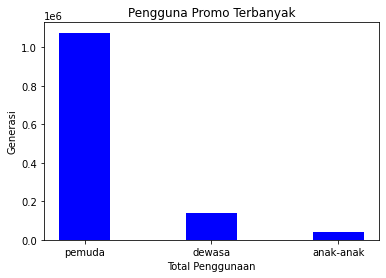

In [ ]:
plt.bar(Generasi['Generasi'], Generasi['Total Penggunaan'], color ='blue',
        width = 0.4)
 
plt.xlabel("Total Penggunaan")
plt.ylabel("Generasi")
plt.title("Pengguna Promo Terbanyak")
plt.show()

In [ ]:
capt4 = merge2[['customer_id', 'Age', 'articleType', 'payment_status']]
capt4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1254585 entries, 0 to 1254584
Data columns (total 4 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   customer_id     1254585 non-null  int64 
 1   Age             1254585 non-null  int64 
 2   articleType     1253966 non-null  object
 3   payment_status  1254585 non-null  object
dtypes: int64(2), object(2)
memory usage: 47.9+ MB


In [ ]:
capt4 = capt4[capt4['payment_status']=='Success']

In [ ]:
capt4 = capt4.groupby('articleType')['payment_status'].size().reset_index()
capt4 = capt4.sort_values(by='payment_status',ascending=False)
capt4 = capt4.rename(columns={"payment_status": "Total_Pembelian"})
capt4.head()

,articleType,Total_Pembelian
134,Tshirts,190657
104,Shirts,86990
19,Casual Shoes,76781
140,Watches,68357
112,Sports Shoes,55115


In [ ]:
capt5 = merge2[['payment_method','session_id']]
capt5.head()

,payment_method,session_id
0,Debit Card,3abaa6ce-e320-4e51-9469-d9f3fa328e86
1,Credit Card,2ee5ead1-f13e-4759-92df-7ff48475e970
2,OVO,93325fb6-eb00-4268-bb0e-6471795a0ad0
3,Credit Card,bcad5a61-1b67-448d-8ff4-781d67bc56e4
4,Credit Card,df1042ab-13e6-4072-b9d2-64a81974c51a


In [ ]:
#Metode pembayaran favorit
pay_fav = capt5.groupby('payment_method')['session_id'].nunique().reset_index()
pay_fav = pay_fav.sort_values(by='session_id', ascending=False)
pay_fav = pay_fav.rename(columns={'session_id': 'Total Penggunaan'})
pay_fav

,payment_method,Total Penggunaan
0,Credit Card,299586
2,Gopay,171334
4,OVO,169066
1,Debit Card,137269
3,LinkAja,75329


In [ ]:
#Hubungan Generasi dengan churn 
Generasi = pd.concat([anak_anak, pemuda, dewasa])
churn_generasi = churn_tot.merge(Generasi, on='customer_id', how='left').nunique().reset_index()

In [ ]:
churn_generasi

,index,0
0,Year_created_x,8
1,Month_created_x,13
2,customer_id,50242
3,Year_created_y,8
4,Month_created_y,13
5,churn,2
6,birthdate,55
7,Age,55
8,promo_code,9
9,gender_x,2


In [ ]:
churn_gen = churn_generasi.groupby(['Generasi','churn'])['customer_id'].count().reset_index()
churn_gen

KeyError: ignored

In [ ]:
#Hubungan Churn dengan Promo
churn_pr = churn_generasi.groupby(['promo_code','churn'])['customer_id'].count().reset_index()
churn_pr

KeyError: ignored

In [ ]:
churn_user1 = churn_tot.groupby(['Year_created_x','churn'])['customer_id'].count().reset_index()
churn_user1 = churn_user1.rename(columns={'customer_id' : 'Total'})
churn_user1

,Year_created_x,churn,Total
0,0.0,0.0,2806
1,0.0,1.0,242884
2,2016.0,0.0,3823
3,2016.0,1.0,1
4,2017.0,0.0,24683
5,2018.0,0.0,52038
6,2019.0,0.0,82500
7,2020.0,0.0,119536
8,2021.0,0.0,170076
9,2022.0,0.0,103288
